## Project:- Credit card approval prediction

#### Goal-Build a machine learning model to predict if an applicant is 'good' or 'bad' client, different from other tasks, the definition of 'good' or 'bad' is not given. You should use some techique, such as vintage analysis to construct you label.

## importing Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

### Application record


* `ID`: Unique Id of the row
* `CODE_GENDER`: Gender of the applicant. M is male and F is female.
* `FLAG_OWN_CAR`: Is an applicant with a car. Y is Yes and N is NO.
* `FLAG_OWN_REALTY`: Is an applicant with realty. Y is Yes and N is No.
* `CNT_CHILDREN`: Count of children.
* `AMT_INCOME_TOTAL`: the amount of the income.
* `NAME_INCOME_TYPE`: The type of income (5 types in total).
* `NAME_EDUCATION_TYPE`: The type of education (5 types in total).
* `NAME_FAMILY_STATUS`: The type of family status (6 types in total).
* `DAYS_BIRTH`: The number of the days from birth (Negative values).
* `DAYS_EMPLOYED`: The number of the days from employed (Negative values). This column has **error values**.
* ` FLAG_MOBIL`: Is an applicant with a mobile. 1 is True and 0 is False.
* ` FLAG_WORK_PHONE`: Is an applicant with a work phone. 1 is True and 0 is False.
* `FLAG_PHONE`: Is an applicant with a phone. 1 is True and 0 is False.
* `FLAG_EMAIL`: Is an applicant with a email. 1 is True and 0 is False.
* ` OCCUPATION_TYPE`: The type of occupation (19 types in total). This column has **missing values**.
* ` CNT_FAM_MEMBERS`: The count of family members.

In [2]:
application_record=pd.read_csv('application_record.csv')

In [6]:
application_record.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


There are many duplicate rows in application csv. They have same values in rows expect ID.

In [9]:
application_record.loc[application_record.DAYS_EMPLOYED==-1194].loc[application_record.DAYS_BIRTH== -10554]

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
213,5009031,F,N,Y,0,315000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-10554,-1194,1,0,0,0,Accountants,1.0
214,5009032,F,N,Y,0,315000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-10554,-1194,1,0,0,0,Accountants,1.0
215,6153669,F,N,Y,0,315000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-10554,-1194,1,0,0,0,Accountants,1.0


In [14]:
application_record= application_record.drop_duplicates(subset=application_record.columns[1:], keep='first', inplace=False)
application_record.loc[application_record.DAYS_BIRTH== -10554]

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
213,5009031,F,N,Y,0,315000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-10554,-1194,1,0,0,0,Accountants,1.0
359960,6491536,F,Y,Y,0,234000.0,Working,Secondary / secondary special,Married,House / apartment,-10554,-1741,1,0,1,0,Waiters/barmen staff,2.0
363841,6508956,M,Y,Y,0,157500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-10554,-534,1,0,0,0,Laborers,1.0
375944,6590652,M,Y,N,0,315000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-10554,-2127,1,0,0,0,Drivers,2.0


In [16]:
application_record.loc[application_record.DAYS_EMPLOYED==-1194].loc[application_record.DAYS_BIRTH== -10554]

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
213,5009031,F,N,Y,0,315000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-10554,-1194,1,0,0,0,Accountants,1.0


### Credit record


This is a csv file with credit record for a part of ID in application record. We can treat it a file to generate labels for modeling. For the applicants who have a record more than 59 past due, they should be rejected.

After reading the data, we have the following columns.

* `ID`: Unique Id of the row in application record.
* `MONTHS_BALANCE`: The number of months from record time.
* `STATUS`: Credit status for this month.
        X: No loan for the month
        C: paid off that month 
        0: 1-29 days past due 
        1: 30-59 days past due 
        2: 60-89 days overdue
        3: 90-119 days overdue 
        4: 120-149 days overdue 
        5: Overdue or bad debts, write-offs for more than 150 days 


In [17]:
credit_record=pd.read_csv('credit_record.csv')

In [18]:
credit_record.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [19]:
credit_record.dtypes

ID                 int64
MONTHS_BALANCE     int64
STATUS            object
dtype: object

In [20]:
credit_record.isnull().sum()

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

In [21]:
application_record.head().T

,0,2,3,7,10
ID,5008804,5008806,5008808,5008812,5008815
CODE_GENDER,M,M,F,F,M
FLAG_OWN_CAR,Y,Y,N,N,Y
FLAG_OWN_REALTY,Y,Y,Y,Y,Y
CNT_CHILDREN,0,0,0,0,0
AMT_INCOME_TOTAL,427500.0,112500.0,270000.0,283500.0,270000.0
NAME_INCOME_TYPE,Working,Working,Commercial associate,Pensioner,Working
NAME_EDUCATION_TYPE,Higher education,Secondary / secondary special,Secondary / secondary special,Higher education,Higher education
NAME_FAMILY_STATUS,Civil marriage,Married,Single / not married,Separated,Married
NAME_HOUSING_TYPE,Rented apartment,House / apartment,House / apartment,House / apartment,House / apartment


In [22]:
application_record.dtypes

ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH               int64
DAYS_EMPLOYED            int64
FLAG_MOBIL               int64
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
dtype: object

## Deal with the missing values

In [23]:
application_record.isnull().sum()

ID                         0
CODE_GENDER                0
FLAG_OWN_CAR               0
FLAG_OWN_REALTY            0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
NAME_HOUSING_TYPE          0
DAYS_BIRTH                 0
DAYS_EMPLOYED              0
FLAG_MOBIL                 0
FLAG_WORK_PHONE            0
FLAG_PHONE                 0
FLAG_EMAIL                 0
OCCUPATION_TYPE        27477
CNT_FAM_MEMBERS            0
dtype: int64

In [24]:
application_record.isnull().sum()/len(application_record)*100

ID                      0.000000
CODE_GENDER             0.000000
FLAG_OWN_CAR            0.000000
FLAG_OWN_REALTY         0.000000
CNT_CHILDREN            0.000000
AMT_INCOME_TOTAL        0.000000
NAME_INCOME_TYPE        0.000000
NAME_EDUCATION_TYPE     0.000000
NAME_FAMILY_STATUS      0.000000
NAME_HOUSING_TYPE       0.000000
DAYS_BIRTH              0.000000
DAYS_EMPLOYED           0.000000
FLAG_MOBIL              0.000000
FLAG_WORK_PHONE         0.000000
FLAG_PHONE              0.000000
FLAG_EMAIL              0.000000
OCCUPATION_TYPE        30.501193
CNT_FAM_MEMBERS         0.000000
dtype: float64

In [25]:
application_record['OCCUPATION_TYPE'].value_counts()

Laborers                 16624
Sales staff               9123
Core staff                8091
Managers                  6675
Drivers                   5860
High skill tech staff     3357
Accountants               3034
Medicine staff            2484
Cooking staff             1764
Security staff            1740
Cleaning staff            1222
Private service staff      750
Low-skill Laborers         569
Secretaries                412
Waiters/barmen staff       393
Realty agents              218
HR staff                   167
IT staff                   125
Name: OCCUPATION_TYPE, dtype: int64

In [26]:
#plt.figure(figsize=(15,8))
#sns.countplot(x='OCCUPATION_TYPE',data=application_record.value_counts(),hue='NAME_EDUCATION_TYPE')

In [27]:
application_record.drop('OCCUPATION_TYPE',axis=1,inplace=True)

## Credit Data

In [28]:
credit_record.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


how many costomers are there when costmer had no load

In [29]:
credit_record.loc[credit_record['STATUS']=='X'].shape[0]/len(credit_record)*100

19.95374675154376

In [30]:
credit_record.loc[credit_record['STATUS']=='X'].shape[0]

209230

how many customers instances are there when customers had paid off

In [31]:
credit_record[credit_record['STATUS']=='C'].shape[0]/len(credit_record)*100

42.1554013780607

So we are left with approx 40% customer months when a customer credit score 0 to 5. looks like a fairly balanced data

it is balanced if you cosider all codes 0 to 5 as belonging to another class(default)

In [32]:
credit_record['STATUS'].value_counts()/len(credit_record)*100

C    42.155401
0    36.537205
X    19.953747
1     1.057626
5     0.161457
2     0.082779
3     0.030518
4     0.021267
Name: STATUS, dtype: float64

In [33]:
defaulter_codes=['0','1','2','3','4','5']

In [34]:
credit_record['label']=np.where(credit_record.STATUS.isin(defaulter_codes), 1,0)

In [35]:
credit_record['label'].value_counts()

0    651261
1    397314
Name: label, dtype: int64

In [36]:
credit_record.head(10)

,ID,MONTHS_BALANCE,STATUS,label
0,5001711,0,X,0
1,5001711,-1,0,1
2,5001711,-2,0,1
3,5001711,-3,0,1
4,5001712,0,C,0
5,5001712,-1,C,0
6,5001712,-2,C,0
7,5001712,-3,C,0
8,5001712,-4,C,0
9,5001712,-5,C,0


In [37]:
credit_record.drop('STATUS',axis=1,inplace=True)

In [38]:
credit_record.head()

,ID,MONTHS_BALANCE,label
0,5001711,0,0
1,5001711,-1,1
2,5001711,-2,1
3,5001711,-3,1
4,5001712,0,0


## Concat customer_record with application_record

In [39]:
print('application_record',application_record.shape)
print('credit_record',credit_record.shape)

application_record (90085, 17)
credit_record (1048575, 3)


In [40]:
record=pd.merge(credit_record,application_record, on="ID",how='left')

In [41]:
record.head()

,ID,MONTHS_BALANCE,label,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
0,5001711,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5001711,-1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5001711,-2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5001711,-3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5001712,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
record.isnull().sum()

ID                          0
MONTHS_BALANCE              0
label                       0
CODE_GENDER            829402
FLAG_OWN_CAR           829402
FLAG_OWN_REALTY        829402
CNT_CHILDREN           829402
AMT_INCOME_TOTAL       829402
NAME_INCOME_TYPE       829402
NAME_EDUCATION_TYPE    829402
NAME_FAMILY_STATUS     829402
NAME_HOUSING_TYPE      829402
DAYS_BIRTH             829402
DAYS_EMPLOYED          829402
FLAG_MOBIL             829402
FLAG_WORK_PHONE        829402
FLAG_PHONE             829402
FLAG_EMAIL             829402
CNT_FAM_MEMBERS        829402
dtype: int64

In [43]:
record.dropna(inplace=True)

In [44]:
record.head()

,ID,MONTHS_BALANCE,label,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
92938,5008804,0,0,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,2.0
92939,5008804,-1,0,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,2.0
92940,5008804,-2,0,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,2.0
92941,5008804,-3,0,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,2.0
92942,5008804,-4,0,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,2.0


In [45]:
record.shape

(219173, 19)

In [46]:
record['label'].value_counts()

0    135739
1     83434
Name: label, dtype: int64

# Data Visualization

In [47]:
record.columns

Index(['ID', 'MONTHS_BALANCE', 'label', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL',
       'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS'],
      dtype='object')

<AxesSubplot:xlabel='label', ylabel='count'>

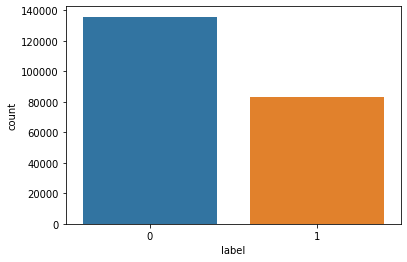

In [48]:
sns.countplot(x='label',data=record)

<AxesSubplot:xlabel='CODE_GENDER'>

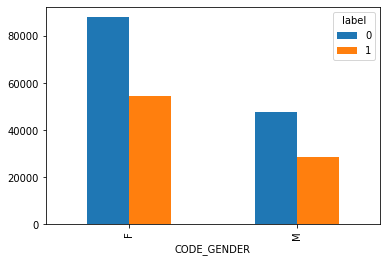

In [49]:
pd.crosstab(record.CODE_GENDER,record.label).plot(kind='bar')

In [50]:
record.head()

,ID,MONTHS_BALANCE,label,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
92938,5008804,0,0,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,2.0
92939,5008804,-1,0,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,2.0
92940,5008804,-2,0,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,2.0
92941,5008804,-3,0,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,2.0
92942,5008804,-4,0,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,2.0


#### Label Hot encoding

In [63]:
record['NAME_INCOME_TYPE'].value_counts()

Working                 110071
Commercial associate     53265
Pensioner                38934
State servant            16838
Student                     65
Name: NAME_INCOME_TYPE, dtype: int64

In [64]:
def name_income(text):
    if text == 'Working':
        return 0
    if text == 'Commercial associate':
        return 1
    if text == 'State servant':
        return 2
    if text == 'Student':
        return 3

In [65]:
record['NAME_INCOME_TYPE']=record['NAME_INCOME_TYPE'].apply(name_income)

In [66]:
record['NAME_INCOME_TYPE'].value_counts()

0.0    110071
1.0     53265
2.0     16838
3.0        65
Name: NAME_INCOME_TYPE, dtype: int64

In [67]:
record['NAME_EDUCATION_TYPE'].value_counts()

Secondary / secondary special    152062
Higher education                  56113
Incomplete higher                  7998
Lower secondary                    2813
Academic degree                     187
Name: NAME_EDUCATION_TYPE, dtype: int64

In [69]:
def name_education(text):
    if text == 'Secondary / secondary special':
        return 0
    if text == 'Higher education':
        return 1
    if text == 'Incomplete higher':
        return 2
    if text == 'Lower secondary':
        return 3
    if text == 'Academic degree':
        return 4

In [70]:
record['NAME_EDUCATION_TYPE']=record['NAME_EDUCATION_TYPE'].apply(name_education)

In [73]:
record.head()

,ID,MONTHS_BALANCE,label,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
92938,5008804,0,0,M,Y,Y,0.0,427500.0,0.0,1,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,2.0
92939,5008804,-1,0,M,Y,Y,0.0,427500.0,0.0,1,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,2.0
92940,5008804,-2,0,M,Y,Y,0.0,427500.0,0.0,1,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,2.0
92941,5008804,-3,0,M,Y,Y,0.0,427500.0,0.0,1,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,2.0
92942,5008804,-4,0,M,Y,Y,0.0,427500.0,0.0,1,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,2.0


In [78]:
record=record.drop(['ID'],axis=1)

In [89]:
# record=record.drop(['NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','FLAG_OWN_REALTY'],axis=1)

In [81]:
record.dtypes

MONTHS_BALANCE           int64
label                    int32
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN           float64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE       float64
NAME_EDUCATION_TYPE      int64
DAYS_BIRTH             float64
DAYS_EMPLOYED          float64
FLAG_MOBIL             float64
FLAG_WORK_PHONE        float64
FLAG_PHONE             float64
FLAG_EMAIL             float64
CNT_FAM_MEMBERS        float64
dtype: object

In [82]:
record['CODE_GENDER'].value_counts()

F    142682
M     76491
Name: CODE_GENDER, dtype: int64

In [83]:
def code_gender(gender):
    if gender == 'F':
        return 0
    else:
        return 1

In [84]:
record['CODE_GENDER']=record['CODE_GENDER'].apply(code_gender)

In [85]:
record['FLAG_OWN_CAR'].value_counts()

N    136870
Y     82303
Name: FLAG_OWN_CAR, dtype: int64

In [86]:
def flag_car(car):
    if car == 'N':
        return 0
    else:
        return 1

In [87]:
record['FLAG_OWN_CAR']=record['FLAG_OWN_CAR'].apply(flag_car)

In [91]:
record=record.drop(['FLAG_OWN_REALTY'],axis=1)

In [92]:
record.head()

,MONTHS_BALANCE,label,CODE_GENDER,FLAG_OWN_CAR,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
92938,0,0,1,1,0.0,427500.0,0.0,1,-12005.0,-4542.0,1.0,1.0,0.0,0.0,2.0
92939,-1,0,1,1,0.0,427500.0,0.0,1,-12005.0,-4542.0,1.0,1.0,0.0,0.0,2.0
92940,-2,0,1,1,0.0,427500.0,0.0,1,-12005.0,-4542.0,1.0,1.0,0.0,0.0,2.0
92941,-3,0,1,1,0.0,427500.0,0.0,1,-12005.0,-4542.0,1.0,1.0,0.0,0.0,2.0
92942,-4,0,1,1,0.0,427500.0,0.0,1,-12005.0,-4542.0,1.0,1.0,0.0,0.0,2.0


In [93]:
record.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219173 entries, 92938 to 1048424
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   MONTHS_BALANCE       219173 non-null  int64  
 1   label                219173 non-null  int32  
 2   CODE_GENDER          219173 non-null  int64  
 3   FLAG_OWN_CAR         219173 non-null  int64  
 4   CNT_CHILDREN         219173 non-null  float64
 5   AMT_INCOME_TOTAL     219173 non-null  float64
 6   NAME_INCOME_TYPE     180239 non-null  float64
 7   NAME_EDUCATION_TYPE  219173 non-null  int64  
 8   DAYS_BIRTH           219173 non-null  float64
 9   DAYS_EMPLOYED        219173 non-null  float64
 10  FLAG_MOBIL           219173 non-null  float64
 11  FLAG_WORK_PHONE      219173 non-null  float64
 12  FLAG_PHONE           219173 non-null  float64
 13  FLAG_EMAIL           219173 non-null  float64
 14  CNT_FAM_MEMBERS      219173 non-null  float64
dtypes: float64(1

In [96]:
record.corr()['label'].sort_values(ascending=False)

label                  1.000000
FLAG_EMAIL             0.014899
AMT_INCOME_TOTAL       0.013119
DAYS_BIRTH             0.009481
CNT_CHILDREN           0.009459
CNT_FAM_MEMBERS        0.007688
FLAG_OWN_CAR           0.006679
NAME_INCOME_TYPE       0.002727
CODE_GENDER           -0.006532
FLAG_PHONE            -0.007430
DAYS_EMPLOYED         -0.008845
NAME_EDUCATION_TYPE   -0.010282
FLAG_WORK_PHONE       -0.017486
MONTHS_BALANCE        -0.169263
FLAG_MOBIL                  NaN
Name: label, dtype: float64

Any missing Values??

In [106]:
record.isnull().sum()

MONTHS_BALANCE             0
label                      0
CODE_GENDER                0
FLAG_OWN_CAR               0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
NAME_INCOME_TYPE       38934
NAME_EDUCATION_TYPE        0
DAYS_BIRTH                 0
DAYS_EMPLOYED              0
FLAG_MOBIL                 0
FLAG_WORK_PHONE            0
FLAG_PHONE                 0
FLAG_EMAIL                 0
CNT_FAM_MEMBERS            0
dtype: int64

In [107]:
record['NAME_INCOME_TYPE']=record.drop('NAME_INCOME_TYPE',axis=1)

In [108]:
X=record.drop('label',axis=1)

In [109]:
y=record['label']

### Train Test Split

In [110]:
from sklearn.model_selection import train_test_split

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


### Model training

#### Decision Tree Classifier

In [112]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [114]:
predictions=tree.predict(X_test)

In [118]:
predictions[:10]

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0])

In [123]:
# y_test[:10]

In [124]:
from sklearn.metrics import classification_report


In [125]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90     40305
           1       0.85      0.84      0.84     25447

    accuracy                           0.88     65752
   macro avg       0.87      0.87      0.87     65752
weighted avg       0.88      0.88      0.88     65752



In [126]:
tree.feature_importances_

array([0.09853429, 0.0231456 , 0.02189226, 0.02058975, 0.13603511,
       0.11417208, 0.03090727, 0.27193146, 0.19601436, 0.        ,
       0.01339589, 0.02276044, 0.01159908, 0.03902242])

In [127]:
dfz=pd.DataFrame({'features':X_train.columns,'importances':tree.feature_importances_})

In [130]:
dfz.sort_values(by='importances',ascending=False)

,features,importances
7,DAYS_BIRTH,0.271931
8,DAYS_EMPLOYED,0.196014
4,AMT_INCOME_TOTAL,0.136035
5,NAME_INCOME_TYPE,0.114172
0,MONTHS_BALANCE,0.098534
13,CNT_FAM_MEMBERS,0.039022
6,NAME_EDUCATION_TYPE,0.030907
1,CODE_GENDER,0.023146
11,FLAG_PHONE,0.022760
2,FLAG_OWN_CAR,0.021892
